# Statistically stationary?

1. Load the PKL file containing P, T and XYZ
2. Plot the time series at each point to check for a portion of statistical stationareity
3. Filter timeseries for the selected time portion.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle, random

In [2]:
# Load data
RAWFILE = "pickledData/PTX(1).pkl"
with open(RAWFILE,'rb') as f: rawdata = pickle.load(f)
T,X,P = rawdata['Time'],rawdata['xCoord'],rawdata['P']

Each row in P corresponds to a timestep, each column corresponds to a location in the longitudinal x-axis

In [3]:
P.tail()

,7,23,39,55,71,87,103,119,135,151,...,663,679,695,711,727,743,759,775,791,807
194568,0.001124,0.001124,0.001217,0.001546,0.001949,0.002198,0.002220,0.002053,0.001745,0.001301,...,0.000052,0.000365,0.000706,0.001060,0.001392,0.001608,0.001650,0.001516,0.001280,0.001280
194569,0.001148,0.001148,0.001203,0.001499,0.001896,0.002162,0.002208,0.002060,0.001760,0.001320,...,0.000024,0.000333,0.000676,0.001036,0.001379,0.001618,0.001679,0.001561,0.001330,0.001330
194570,0.001181,0.001181,0.001197,0.001456,0.001844,0.002124,0.002194,0.002065,0.001775,0.001341,...,-0.000004,0.000303,0.000647,0.001014,0.001368,0.001628,0.001710,0.001608,0.001385,0.001385
194571,0.001219,0.001219,0.001200,0.001420,0.001793,0.002085,0.002177,0.002068,0.001789,0.001361,...,-0.000027,0.000276,0.000621,0.000994,0.001356,0.001637,0.001740,0.001654,0.001441,0.001441
194572,0.001258,0.001258,0.001205,0.001385,0.001741,0.002043,0.002157,0.002069,0.001803,0.001382,...,-0.000048,0.000252,0.000596,0.000974,0.001343,0.001641,0.001765,0.001694,0.001492,0.001492


## Signal plots

Plot the pressure signal from one random location

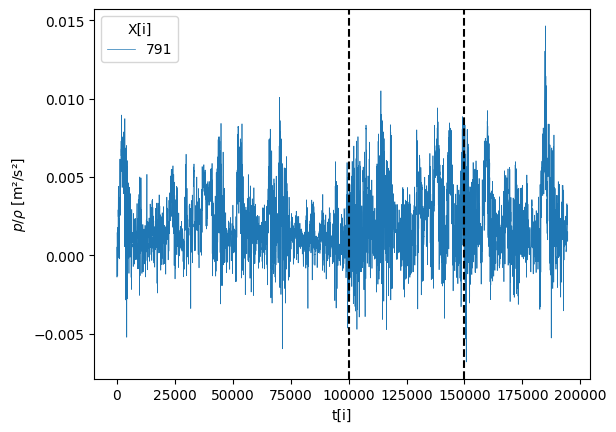

In [4]:
## Select a portion of the pressure signal
t0,t1 = 100000,150000

# Plot a sample of the timeseries
fig,ax = plt.subplots()
P.sample(n=1,axis=1).plot(ax=ax,lw=0.5)
ax.axvline(x=t0,c='k',ls='dashed')
ax.axvline(x=t1,c='k',ls='dashed')
ax.legend(title="X[i]",ncol=2)
ax.set(ylabel=r"$p/\rho$ [m²/s²]",xlabel="t[i]")
plt.show()

Plot multiple samples of the timeseries with and a rolling average. 

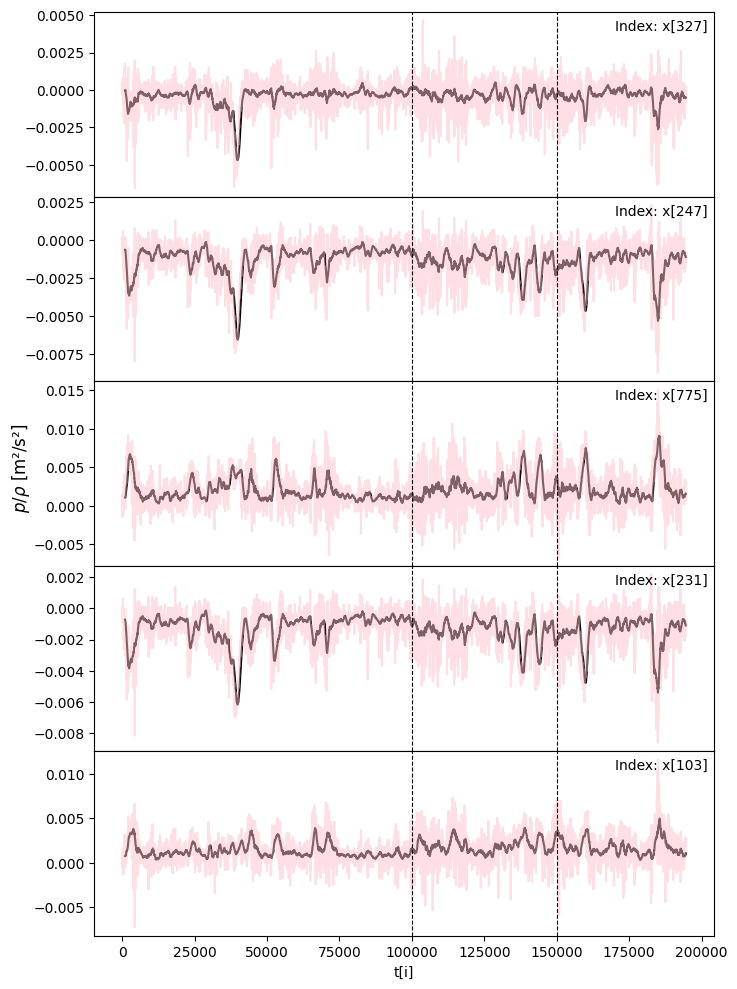

In [5]:
nSample = 5
fig,axs = plt.subplots(nrows=nSample,ncols=1,sharex=True,\
              figsize=[8,12],gridspec_kw={"hspace":0})

for ax,x in zip(axs,random.sample(list(P.columns),nSample)):
    cumP = (P.loc[:,x].rolling(1000).mean())
    ax.plot(cumP,zorder=2,c='k')
    ax.plot(P.loc[:,x],alpha=0.5,c='pink')
    ax.text(0.99,0.9, f"Index: x[{x}]", transform=ax.transAxes, ha='right')
    ax.axvline(x=t0,c='k',ls='dashed',lw=0.8)
    ax.axvline(x=t1,c='k',ls='dashed',lw=0.8)

ax.set_xlabel("t[i]")
fig.supylabel(r"$p/\rho$ [m²/s²]")
plt.show()

Plot a histogram to compare the full signal and the clipped portion

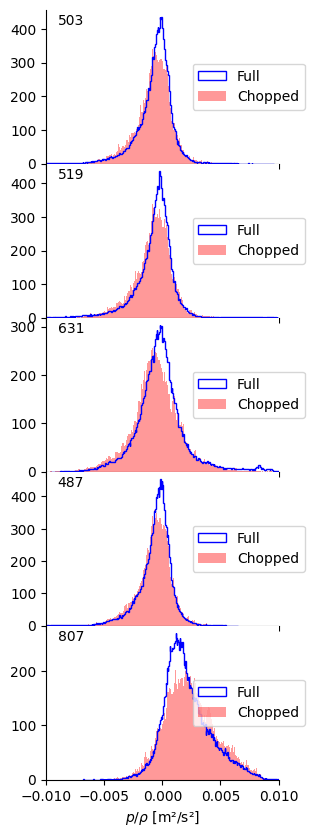

In [6]:
fig,axs = plt.subplots(nrows=nSample,ncols=1,sharex=True,figsize=[3,10],gridspec_kw={"hspace":0})

hist_dict_full = dict(bins='sqrt',density=True,alpha=1.0,color='b',histtype='step',label='Full')
hist_dict_chop = dict(bins='sqrt',density=True,alpha=0.4,color='r',label='Chopped')

for ax,x in zip(axs,random.sample(list(P.columns),nSample)):
    ax.hist(P.loc[:,x],**hist_dict_full)
    ax.hist(P.loc[t0:t1,x],**hist_dict_chop)
    ax.text(0.05,0.9,x,transform=ax.transAxes)
    ax.legend(loc='center left',bbox_to_anchor = [0.60,0.5])
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)

ax.set(xlim=[-0.01,0.01])
ax.set_xlabel(r"$p/\rho$ [m²/s²]")
plt.show()

Plot statistics over the X-coordinate

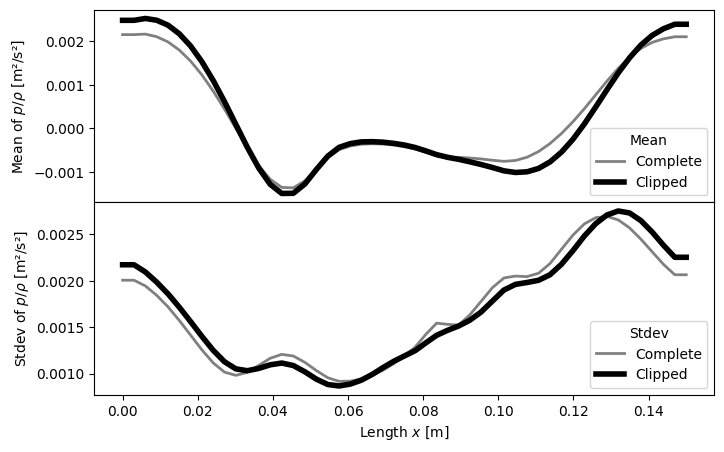

In [7]:
fig,axs = plt.subplots(2,1,sharex=True,figsize=[8,5],gridspec_kw={"hspace":0})

ax = axs[0]
ax.plot(X['X'],P.mean(),label="Complete", lw=2, c='gray')
ax.plot(X['X'],P[t0:t1].mean(),label="Clipped", lw=4, c='k')
ax.set_ylabel(r"Mean of $p/\rho$ [m²/s²]")
ax.legend(title="Mean",loc='lower right')

ax = axs[1]
ax.plot(X['X'],P.std(),label="Complete", lw=2, c='gray')
ax.plot(X['X'],P[t0:t1].std(),label="Clipped", lw=4, c='k')
ax.set_ylabel(r"Stdev of $p/\rho$ [m²/s²]")
ax.legend(title="Stdev",loc='lower right')

ax.set_xlabel("Length $x$ [m]")
plt.show()

Pickled the clipped signal

In [8]:
# Assemble a dict with the T,X and P
T,X,P = T[t0:t1],X,P[t0:t1]
fullDict = {"Time":T,"xCoord":X,"P":P}

# Pickle data
NEWFILE = "pickledData/PTX(2).pkl"
with open(NEWFILE,'wb') as f: pickle.dump(fullDict,f)